# Quadrature Mixers, IQ Demodulation, and the Tayloe Detector - part 2
- https://www.youtube.com/watch?v=JuuKF1RFvBM  
- http://www.analogzoo.com/2015/08/quadrature-mixers/  
- https://en.wikipedia.org/wiki/In-phase_and_quadrature_components

In [1]:
import os, sys

def gen_relative_path(target_path): 
    
    def del_same_parents(target_path, current_path):
        if len(target_path) * len(current_path) > 0:
            if target_path[0] == current_path[0]:
                target_path.pop(0)
                current_path.pop(0)
                del_same_parents(target_path, current_path)
            
    current_path = os.getcwd().replace('\\', '/').split('/')
    target_path = target_path.replace('\\', '/').split('/')
    del_same_parents(target_path, current_path)
    
    return ['..'] * len(current_path) + target_path


def append_source_relative_path(source_relative_path):
    sys.path.append(os.sep.join(source_relative_path))

In [2]:
# paths = ['']
# paths = [gen_relative_path(p) for p in paths]
# print(paths)

In [3]:
paths = [['..', '..', '..', '..', '..', 'Waves', 'bitbucket', 'github', 'codes'],
         ['..', 'codes']]

for path in paths:
    append_source_relative_path(path)

In [4]:
%pylab inline

from waves.sound import *

Populating the interactive namespace from numpy and matplotlib


In [5]:
import warnings 

warnings.filterwarnings('ignore')

In [6]:
def show_pair(sig_left, sig_right, frames = 300):
    sig_left.show(color = 'red', show_frames = slice(0, frames))
    sig_right.show(color = 'green', show_frames = slice(0, frames))

## LO

In [7]:
freq_lo = int(100e3)
freq_sampling = freq_lo * 8 * 2

duration_seconds = 1
t = np.linspace(0, duration_seconds, duration_seconds * freq_sampling)

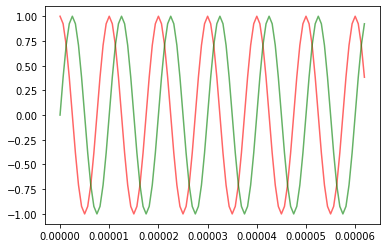

In [8]:
LO_I = Channel(np.cos(PI2 * freq_lo * t), ts = t, framerate = freq_sampling)
LO_Q = Channel(np.sin(PI2 * freq_lo * t), ts = t, framerate = freq_sampling) 

show_pair(LO_I, LO_Q, 100)

In [9]:
# LO_I.make_spectrum().plot(freq_lims = (1, freq_sampling))

## RF

In [10]:
freq_if = int(1e3)

RF_plus =  Channel(np.exp(1j * PI2 * (freq_lo + freq_if) * t), ts = t, framerate = freq_sampling)
RF_minus = Channel(np.exp(1j * PI2 * (freq_lo - freq_if) * t), ts = t, framerate = freq_sampling)

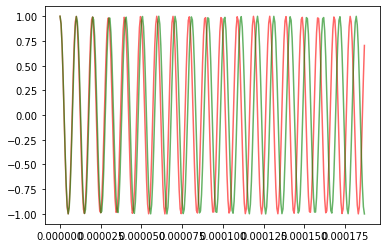

In [11]:
show_pair(RF_plus, RF_minus, 300)

In [12]:
# RF_plus.ys  = RF_plus.ys.real
# RF_minus.ys = RF_minus.ys.real
# show_pair(RF_plus, RF_minus, 300)

### IF

#### IF_plus

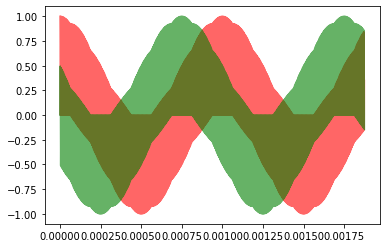

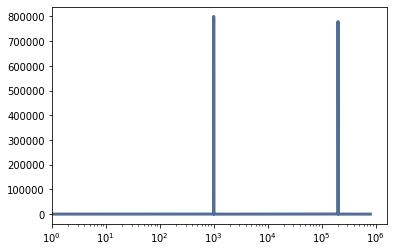

In [13]:
IF_plus_I = RF_plus * LO_I
IF_plus_Q = RF_plus * LO_Q

show_pair(IF_plus_I, IF_plus_Q, 3000)

plt.figure()
IF_plus_Q.make_spectrum().plot(freq_lims = (1, freq_sampling));

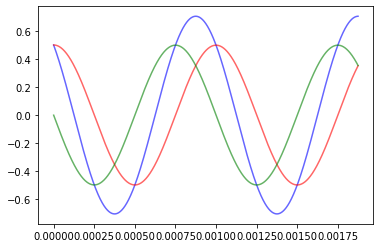

In [14]:
IF_plus_I = IF_plus_I.filter(low_pass_cutoff = freq_if * 2)
IF_plus_Q = IF_plus_Q.filter(low_pass_cutoff = freq_if * 2)
IF_plus = IF_plus_I + IF_plus_Q
# IF_plus = Channel(IF_plus_I.ys + IF_plus_Q.ys, ts = t, framerate = freq_sampling) 


IF_plus.show(  color = 'blue', show_frames = slice(0, 3000))
show_pair(IF_plus_I, IF_plus_Q, 3000)

# plt.figure()
# IF_plus_Q.make_spectrum().plot(freq_lims = (1, freq_sampling));

In [15]:
# IF_plus.make_spectrum().plot(freq_lims = (1, freq_sampling))

#### IF_minus

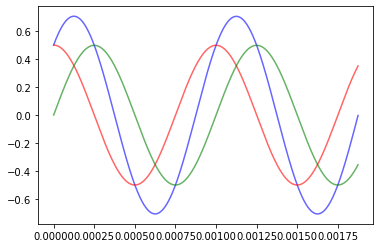

In [16]:
IF_minus_I = RF_minus * LO_I
IF_minus_Q = RF_minus * LO_Q 

IF_minus_I = IF_minus_I.filter(low_pass_cutoff = freq_if * 2)
IF_minus_Q = IF_minus_Q.filter(low_pass_cutoff = freq_if * 2)
IF_minus = IF_minus_I + IF_minus_Q
# IF_minus = Channel(IF_minus_I.ys + IF_minus_Q.ys, ts = t, framerate = freq_sampling) 

IF_minus.show(  color = 'blue', show_frames = slice(0, 3000))
show_pair(IF_minus_I, IF_minus_Q, 3000)

In [17]:
# IF_minus_Q.make_spectrum().plot(freq_lims = (1, freq_sampling))

## I+Q

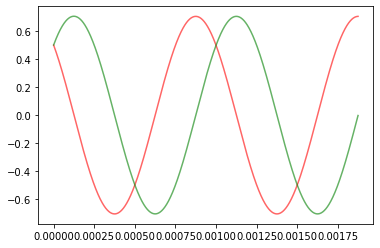

In [18]:
show_pair(IF_plus, IF_minus, 3000)

### Cosine portions
- cosine 的成分是一致的

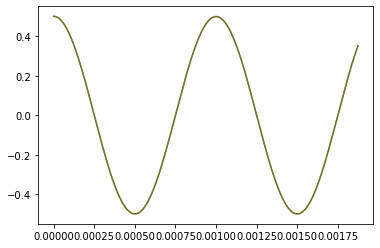

In [19]:
show_pair(IF_plus_I, IF_minus_I, 3000)

### Sine portions
- sine 的成分有差別，可以用來區分頻率的 正負號 與 方向性

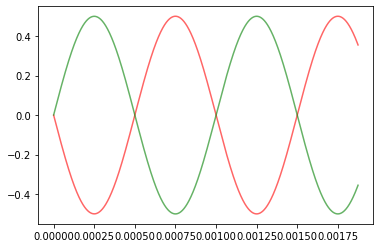

In [20]:
show_pair(IF_plus_Q, IF_minus_Q, 3000)

## Summary
- 這需要 複數平面才可以啊? 但是RF訊號可以用 IQ Demodulation，難道真實世界的訊號含有複數的成分? Imagery number 其實是真實存在的?
- 那麼，可以用在 audiotory signals 上面嗎?